Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 192, 512)          1024      
                                                                 
 activation (Activation)     (None, 192, 512)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 512)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 96, 512)           0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 2048)              100665344 
                                                        

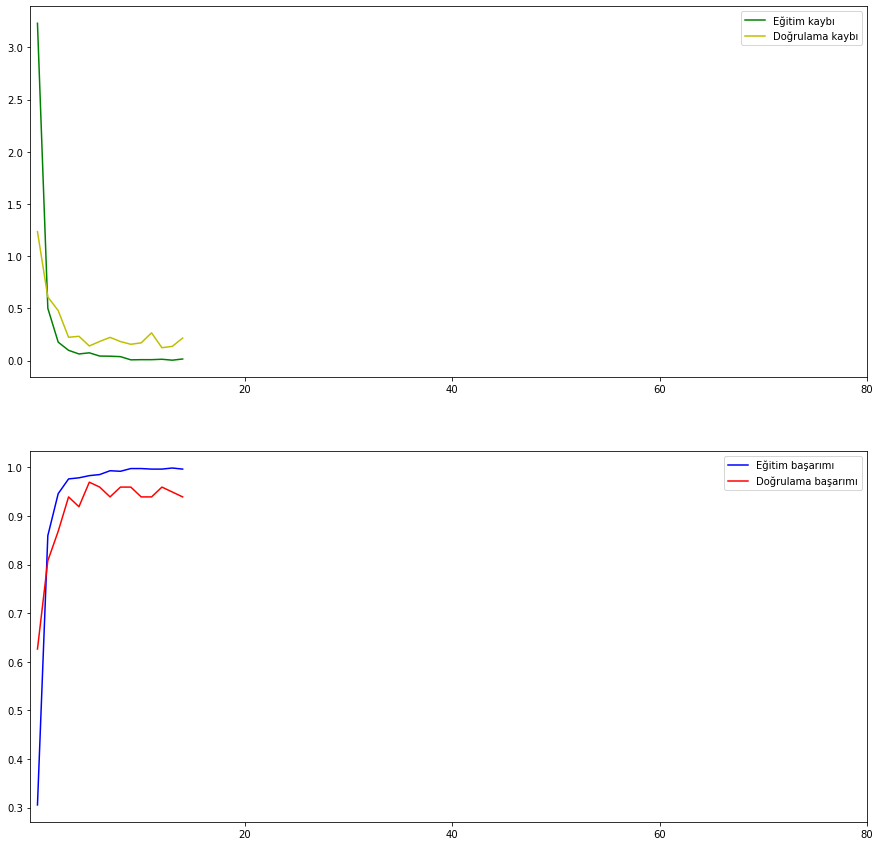

In [2]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Test ve eğitim verilerinin okunması
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

# Sınıfların belirlenmesi ve etiketlenmesi
label_encoder = LabelEncoder().fit(train.species)
labels = label_encoder.transform(train.species)
classes = list(label_encoder.classes_)

# Verilerin hazırlanması, özellik ve sınıf sayısının belirlenmesi
train = train.drop(["id", "species"], axis=1)
test = test.drop(["id"], axis=1)
nb_features = 192
nb_classes = len(classes)

# Eğitim verisindeki verilerin standartlaştırılması
scaler = StandardScaler().fit(train.values)
train = scaler.transform(train.values)

# Eğitim verisinin eğitimi ve doğrulama için ayarlanması
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.1)

# Etiketlerin kategorilerinin belirlenmesi
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

# Giriş verilerinin boyutlarının ayarlanması
X_train = np.array(X_train).reshape(891, 192, 1)
X_valid = np.array(X_valid).reshape(99, 192, 1)

# 1DESA modelinin oluşturulması
model = Sequential()
model.add(Conv1D(512, 1, input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))
model.summary()

# Ağın derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Modelin eğitilmesi
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

# Ortalama değerlerin gösterilmesi
print("Ortalama Eğitim Kaybı: ", np.mean(model.history.history["loss"]))
print("Ortalama Eğitim Başarımı: ", np.mean(model.history.history["accuracy"]))
print("Ortalama Doğrulama Kaybı: ", np.mean(model.history.history["val_loss"]))
print("Ortalama Doğrulama Başarımı: ", np.mean(model.history.history["val_accuracy"]))

# Değerlerin grafik üzerinde gösterilmesi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
ax1.plot(model.history.history["loss"], color="g", label="Eğitim kaybı")
ax1.plot(model.history.history["val_loss"], color="y", label="Doğrulama kaybı")
ax1.set_xticks(np.arange(20, 100, 20))
ax1.legend()

ax2.plot(model.history.history["accuracy"], color="b", label="Eğitim başarımı")
ax2.plot(model.history.history["val_accuracy"], color="r", label="Doğrulama başarımı")
ax2.set_xticks(np.arange(20, 100, 20))
ax2.legend()
plt.show()